# Gene Selection
Select genes that have strong time trend and small variance.

In [112]:
import pandas as pd
import numpy as np

In [113]:
acf_full_result = pd.read_csv("acf_full_results.tsv", sep='\t', index_col=0)

In [114]:
acf_full_result.head()

,Pval_1,Pval_2,Pval_3,Pval_4,Pval_5,Pval_6,Pval_7,Pval_8,Pval_9,Mean_1,...,LB_9,UB_1,UB_2,UB_3,UB_4,UB_5,UB_6,UB_7,UB_8,UB_9
SSMa000210,0.72,1.00,0.70,0.26,1.00,0.74,0.16,0.98,0.86,-0.065487,...,-0.170298,0.351926,0.252192,0.389373,0.174376,0.336367,0.173388,0.079048,0.239542,0.210010
SSMa000220,0.06,0.00,0.16,0.06,0.32,0.20,0.08,0.66,0.40,0.239587,...,-0.374807,0.436202,-0.062070,0.105105,0.005555,0.046148,0.320359,0.419510,0.161087,0.103147
SSMa000230,0.52,0.30,0.00,0.56,0.24,0.52,0.10,0.44,0.92,0.091750,...,-0.227515,0.302227,0.088562,-0.046056,0.196136,0.034833,0.191245,0.307431,0.292873,0.181350
SSMa000260,0.68,0.84,0.04,0.44,0.04,0.76,0.64,0.98,0.84,0.119879,...,-0.337034,0.467024,0.161834,-0.026755,0.267943,-0.020589,0.184505,0.271071,0.182817,0.139403
SSMa000270,0.96,0.42,0.24,0.84,0.30,0.74,0.44,0.98,0.96,0.012639,...,-0.324155,0.377218,0.226754,0.167120,0.314854,0.155841,0.274730,0.408502,0.276437,0.202365


I limit the selection of representative genes to those that has at least one p value being zero.

In [115]:
pval_mat = acf_full_result.loc[:, [f'Pval_{j}' for j in np.arange(1, 10)]].to_numpy()

In [116]:
significant_filter = np.any(pval_mat == 0, axis=1)

In [117]:
acf_subset_result = acf_full_result.loc[significant_filter, :]

In [118]:
acf_subset_result.shape

(2040, 45)

In [128]:
lower_bound = acf_subset_result.loc[:, [f'LB_{j}' for j in np.arange(1, 10)]]
upper_bound = acf_subset_result.loc[:, [f'UB_{j}' for j in np.arange(1, 10)]]
# sd = acf_full_result.loc[:, [f'SD_{j}' for j in np.arange(1, 7)]]
mean = acf_full_result.loc[:, [f'Mean_{j}' for j in np.arange(1, 10)]]

In [129]:
lower_bound_mat = lower_bound.to_numpy()
upper_bound_mat = upper_bound.to_numpy()

In [130]:
significance_mat = np.zeros_like(lower_bound_mat)

In [131]:
significance_mat[lower_bound_mat > 0] = 1
significance_mat[upper_bound_mat < 0] = -1

In [132]:
sum_pos_significant = np.sum(significance_mat > 0, axis=0)
sum_neg_significant = np.sum(significance_mat < 0, axis=0)

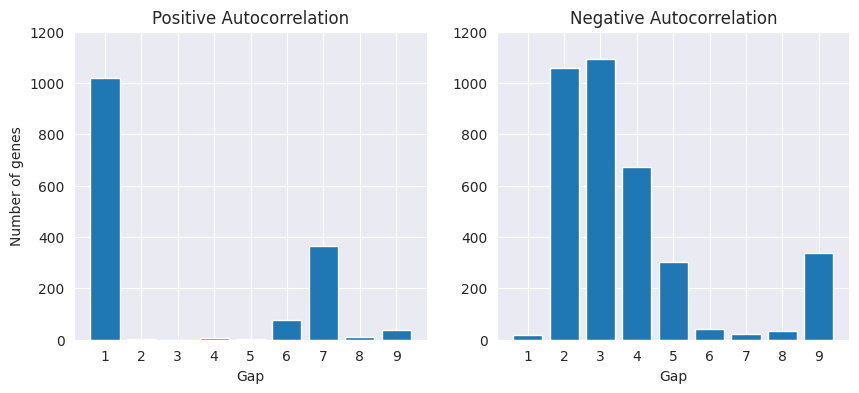

In [133]:
import matplotlib.pyplot as plt
gap = np.arange(1, 10)

fig1, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax1[0].bar(gap, sum_pos_significant)
ax1[0].set_xlabel("Gap")
ax1[0].set_xticks(gap)
ax1[0].set_ylabel("Number of genes")
ax1[0].set_title("Positive Autocorrelation")
ax1[0].set_ylim(0, 1200)

ax1[1].bar(gap, sum_neg_significant)
ax1[1].set_xticks(gap)
ax1[1].set_xlabel("Gap")
# ax1[1].set_ylabel("Number of genes")
ax1[1].set_title("Negative Autocorrelation")
ax1[1].set_ylim(0, 1200)

fig1.savefig("Significant_Autocorrelation", dpi=400, bbox_inches='tight')

I decide to take a look at the genes with the strongest positive autocorrelations at lag 1, 6, 7, 9 and the strongest negative autocorrelations at lag 2,3,4,5,8,9.

In [134]:
pos_genes = np.where(significance_mat[:, 0] > 0)[0]

In [138]:
lower_bound['LB_2'].nlargest(5).index.tolist()

['SSMa095500', 'SSMd290070', 'SSMb227890', 'SSMb131130', 'SSMe317460']

In [139]:
pos_1_gene = lower_bound['LB_1'].nlargest(5).index.tolist()
pos_6_gene = lower_bound['LB_6'].nlargest(5).index.tolist()
pos_7_gene = lower_bound['LB_7'].nlargest(5).index.tolist()
pos_9_gene = lower_bound['LB_9'].nlargest(5).index.tolist()

neg_1_gene = upper_bound['UB_1'].nsmallest(5).index.tolist()
neg_2_gene = upper_bound['UB_2'].nsmallest(5).index.tolist()
neg_3_gene = upper_bound['UB_3'].nsmallest(5).index.tolist()
neg_4_gene = upper_bound['UB_4'].nsmallest(5).index.tolist()
neg_5_gene = upper_bound['UB_5'].nsmallest(5).index.tolist()
neg_6_gene = upper_bound['UB_6'].nsmallest(5).index.tolist()
neg_7_gene = upper_bound['UB_7'].nsmallest(5).index.tolist()
neg_8_gene = upper_bound['UB_8'].nsmallest(5).index.tolist()
neg_9_gene = upper_bound['UB_9'].nsmallest(5).index.tolist()
neg_9_gene = upper_bound['UB_9'].nsmallest(5).index.tolist()


In [140]:
iconic_genes = pd.DataFrame({'pos_1': pos_1_gene,
                             'pos_6': pos_6_gene,
                             'pos_7': pos_7_gene,
                             'pos_9': pos_9_gene,
                             'neg_1': neg_1_gene,
                             'neg_2': neg_2_gene,
                             'neg_3': neg_3_gene,
                             'neg_4': neg_4_gene,
                             'neg_5': neg_5_gene,
                             'neg_6': neg_6_gene,
                             'neg_7': neg_7_gene,
                             'neg_8': neg_8_gene,
                             'neg_9': neg_9_gene})

Let's visualize some of the genes.

In [141]:
gene_expression_mean = pd.read_csv("gene_expression_mean_cluster.csv", sep='\t', index_col=0)
gene_expression_sd = pd.read_csv("gene_expression_std_cluster.csv", sep='\t', index_col=0)

In [142]:
categories = iconic_genes.columns.tolist()
timepoints = gene_expression_mean.columns[0:12].tolist()

In [144]:
for category in categories:

    genes = iconic_genes[category].tolist()
    for j in range(len(genes)):
        selected_gene = genes[j]
        selected_mean = gene_expression_mean.loc[genes[j], timepoints].to_numpy()
        selected_std = gene_expression_sd.loc[genes[j], timepoints].to_numpy()
        selected_ac_mean = mean.loc[genes[j], :].to_numpy()
        selected_ac_lb = lower_bound.loc[genes[j], :].to_numpy()
        selected_lower_error = selected_ac_mean - selected_ac_lb
        selected_ac_ub = upper_bound.loc[genes[j], :].to_numpy()
        selected_upper_error = selected_ac_ub - selected_ac_mean

        fig2, ax2=plt.subplots(figsize=(10, 4), nrows=1, ncols=2)

        ax2[0].errorbar(np.arange(1, 13), selected_mean, yerr=selected_std,
                        fmt='-o', color="#344885", capsize=5, alpha=0.7)
        ax2[0].set_xticks(np.arange(1, 13), labels=timepoints)
        ax2[0].set_xlabel('Month')
        ax2[0].set_title(selected_gene)
        ax2[0].set_ylabel('Log Gene Expression(TPM)')

        ax2[1].errorbar(np.arange(1, 10), selected_ac_mean, yerr = np.stack((selected_lower_error, selected_upper_error), axis=0), fmt='-o', color="#344885", capsize=5, alpha=0.7)
        ax2[1].set_xticks(np.arange(1, 10))
        ax2[1].axhline(0, color='r', linestyle='--')
        ax2[1].set_xlabel("Lag")
        ax2[1].set_ylabel("Autocorrelation")
        ax2[1].set_title(selected_gene)

        filename = f'individual_plots/{category}_{j}.png'
        fig2.savefig(filename, dpi=400, bbox_inches='tight')
        plt.close(fig2)


In [121]:
pos_significant = [[] for _ in range(6)]
neg_significant = [[] for _ in range(6)]

In [122]:
for i in range(6):
    pos_significant[i] = lower_bound.index[lower_bound[f"LB_{i+1}"] > 0]
    neg_significant[i] = upper_bound.index[upper_bound[f"UB_{i+1}"] < 0]

For the genes that have significant autocorrelation at each lag, find the ones that have the smallest standard deviation.

In [123]:
selected_pos_significant_mean = [[] for _ in range(6)]
selected_neg_significant_mean = [[] for _ in range(6)]
selected_pos_significant_sd = [[] for _ in range(6)]
selected_neg_significant_sd = [[] for _ in range(6)]

In [124]:
for i in range(6):

    # mean_subset = mean.loc[pos_significant[i], :]
    # selected_pos_significant_mean[i] = mean_subset[f'Mean_{i+1}'].nlargest(10).index.tolist()
    # mean_subset = mean.loc[neg_significant[i], :]
    # selected_neg_significant_mean[i] = mean_subset[f'Mean_{i+1}'].nsmallest(10).index.tolist()
    # sd_subset = sd.loc[pos_significant[i], :]
    # selected_pos_significant_sd[i] = sd_subset[f'SD_{i+1}'].nsmallest(10).index.tolist()
    # sd_subset = sd.loc[neg_significant[i], :]
    # selected_neg_significant_sd[i] = sd_subset[f'SD_{i+1}'].nsmallest(10).index.tolist()

In [125]:
gene_expression_mean = pd.read_csv("gene_expression_mean_cluster.csv", sep='\t', index_col=0)
gene_expression_std = pd.read_csv("gene_expression_mean_cluster.csv", sep='\t', index_col=0)

In [126]:
gene_expression_mean.head()

,2,4,6,8,10,12,13,15,17,18,21,23,Cluster
Gene,,,,,,,,,,,,,
SSMa000210,-0.282194,-0.822954,-0.404592,-0.499344,-0.424275,-0.215400,-0.414397,-0.321717,-0.201947,-0.401857,-0.421982,-0.255391,5
SSMa000220,1.215383,1.122929,0.939383,0.926112,0.979166,0.974276,1.018113,1.095271,1.005141,0.965978,0.968764,1.003391,2
SSMa000230,1.660489,1.571259,1.273406,1.283803,1.385245,1.478232,1.390275,1.558686,1.409216,1.457385,1.338564,1.380999,6
SSMa000260,0.460906,0.229148,0.175184,0.118433,0.162328,0.088607,0.204264,0.247905,0.217787,0.179337,0.168924,0.258668,2
SSMa000270,1.559363,1.511788,1.227636,1.315878,1.385016,1.469393,1.393231,1.509882,1.382213,1.385814,1.372203,1.372743,6


In [127]:
pos_genes = [item for sublist in selected_pos_significant_mean for item in sublist]

40

In [129]:
pos_genes = list(set(pos_genes))
len(pos_genes)

40

In [89]:
neg_genes = [item for sublist in selected_neg_significant_mean for item in sublist]
len(neg_genes)

60